In [1]:
import sys,os,pickle,copy
sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
import numpy as np
import numpy
import pandas as pd
import scipy
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
from importlib import reload
import seaborn as sns

import preprocess as prep

from sklearn.decomposition import NMF

import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
import matplotlib.pyplot as plt
%matplotlib inline

import nmf_analysis as na
import nmf_plot as nmfp
reload(na)
import data_prep_pyn as dpp

import pynapple as nap
from sklearn.cluster import KMeans
import database
db = database.db

In [2]:
import ruptures as rpt

import nmf_test as nt

In [3]:
data_dir_full=db.query('owner=="roman"')['data_dir_full'][0]
data_dir_full
db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)

data_dir_full  \
animal_name                                                        
e13_26m1    0  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e15_13f1    0  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
...                                                          ...   
e16_2m1     0  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m...   
e16_1f1     0  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e14_2m3     0  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   

                     sess_name animal_name.1        date  \
animal_name                                                
e13_26m1    0  e13_26m1_210913      e13_26m1  2021-09-13   
e15_13f1    0  e15_13f1_220117      e15_13f1  2022-01-17   
            1  e15_13f1_220118      e15_13f1  2022-01-18   
            2  e15_13f1_220119      e15_13f1  2022-01-19   
            3  e15_13f1_220120      e15_13f1  2022-01-20   
...                        ...           ...         ...   
e16_2m1     0   e16_2m1_201116       e16_2m1  2020-11-16   
e16_1f1     0   e16_1f1_200823       e16_1f1  2020-08-23   
            1   e16_1f1_200824       e16_1f1  2020-08-24   
e14_2m3     0   e14_2m3_201017       e14_2m3  2020-10-17   
            1   e14_2m3_201019       e14_2m3  2020-10-19   

                                    behavior  performance  ntrials  \
animal_name                                                          
e13_26m1    0                    alternation     0.956522       69   
e15_13f1    0                    alternation     0.617647       34   
            1   ['alternation' 'linearMaze']     0.740741       27   
            2  ['alternation' 'alternation']     0.721311       61   
            3   ['alternation' 'linearMaze']     0.800000       45   
...                                      ...          ...      ...   
e16_2m1     0                    alternation     0.636364       11   
e16_1f1     0                    alternation     0.631579       19   
            1                    alternation     0.571429       21   
e14_2m3     0                    alternation     0.615385       26   
            1                    alternation     0.863636       22   

               ngoodtrials  n_neurons  n_pyr_putative  owner   data_root  
animal_name                                                               
e13_26m1    0           69        482             422  roman  roman_data  
e15_13f1    0           34        376             333  roman  roman_data  
            1           27        363             318  roman  roman_data  
            2           61        343             288  roman  roman_data  
            3           45        303             248  roman  roman_data  
...                    ...        ...             ...    ...         ...  
e16_2m1     0           11         50              37  roman  roman_data  
e16_1f1     0           19         47              32  roman  roman_data  
            1           21         40              27  roman  roman_data  
e14_2m3     0           26         34              26  roman  roman_data  
            1           22         36              22  roman  roman_data  

[67 rows x 12 columns]

In [4]:
data_dir_full = '/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/'

In [5]:
# load data
mat_to_return=prep.load_stuff(data_dir_full,sessionPulses = '*SessionPulses.Events.mat')
# sessionPulses=mat_to_return['sessionPulses']
behavior=mat_to_return['behavior']

prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
spk_beh_df=prep_res['spk_beh_df']
cell_cols_d = prep_res['cell_cols_d']
beh_df = prep_res['beh_df']

load *SessionPulses.Events.mat failed


In [7]:
import nmf_one_session as nos
reload(nos)
n_compo=4
nmf_res = nos.nmf_one_session(data_dir_full,kwargs_={'n_compo':n_compo,'dosave':False,'doplots':False,'force_reload':False})


<module 'sys' (built-in)>
<module 'sys' (built-in)>
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/nmf/nmf_4.p already exists! Loading--


In [8]:
X_normed_restacked_df_d = nmf_res['X_normed_restacked_df_d']
key = (0,0)
X_normed_restacked_df = X_normed_restacked_df_d[key]

In [8]:
X_normed_restacked_df

trial               0.0       2.0       4.0       6.0       8.0       9.0   \
    lin_binned                                                               
42  0           0.494118  0.316880  0.232941  0.334073  0.293121  0.111379   
    1           0.000000  0.176471  0.000000  0.000000  0.000000  0.000000   
    2           0.086993  0.010209  0.018437  0.011129  0.000000  0.000000   
    3           0.178793  0.146110  0.172367  0.171922  0.116537  0.137255   
    4           0.423529  0.504202  0.601810  0.294786  0.499374  0.647059   
...                  ...       ...       ...       ...       ...       ...   
303 5           0.094907  0.000000  0.000000  0.000000  0.000000  0.000000   
    6           0.000000  0.183036  0.000000  0.000000  0.000000  0.000000   
    7           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    8           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    9           0.650794  0.000000  0.000000  0.000000  0.000000  0.000000   

trial               11.0      12.0      14.0      16.0  ...      31.0  \
    lin_binned                                          ...             
42  0           0.245423  0.167183  0.351824  0.195046  ...  0.179821   
    1           0.000000  0.000000  0.000000  0.050079  ...  0.000000   
    2           0.000000  0.000000  0.000000  0.035294  ...  0.000000   
    3           0.125623  0.141755  0.191384  0.339706  ...  0.126697   
    4           0.259259  0.210904  0.149733  0.061765  ...  0.159393   
...                  ...       ...       ...       ...  ...       ...   
303 5           0.000000  0.000000  0.000000  0.000000  ...  0.122754   
    6           0.000000  0.000000  0.000000  0.000000  ...  0.000000   
    7           0.000000  0.000000  0.000000  0.000000  ...  0.000000   
    8           0.000000  0.000000  0.000000  0.000000  ...  0.000000   
    9           0.000000  0.000000  0.000000  0.000000  ...  0.000000   

trial               33.0      34.0      36.0      38.0      39.0      41.0  \
    lin_binned                                                               
42  0           0.158585  0.071267  0.080344  0.214834  0.330040  0.177624   
    1           0.000000  0.036332  0.039848  0.000000  0.000000  0.000000   
    2           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    3           0.032941  0.222758  0.137255  0.181661  0.280749  0.082353   
    4           0.316356  0.301961  0.243316  0.181661  0.126506  0.033386   
...                  ...       ...       ...       ...       ...       ...   
303 5           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    6           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    7           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    8           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    9           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

trial               43.0      44.0      45.0  
    lin_binned                                
42  0           0.346197  0.032941  0.100690  
    1           0.000000  0.000000  0.000000  
    2           0.000000  0.000000  0.000000  
    3           0.123529  0.126697  0.048682  
    4           0.159393  0.041176  0.130031  
...                  ...       ...       ...  
303 5           0.000000  0.000000  0.000000  
    6           0.000000  0.000000  0.000000  
    7           0.000000  0.000000  0.000000  
    8           0.000000  0.000000  0.000000  
    9           0.000000  0.000000  0.320312  

[2470 rows x 27 columns]

In [9]:
import nmf_cpd as nc
reload(nc)
X = X_normed_restacked_df.values
n_compo = 6
n_bkps = 2
w_,h_,bkps_l,err_tot_l = nc.nmf_pwc_h_fit(X,n_compo,n_bkps=n_bkps,max_iters_outer=10,max_iters_rank1=4,tol=1e-8,w_init=None,h_init=None)



In [171]:
err_tot_l

[576.5355761468832,
 558.5303735757352,
 555.7061933463191,
 554.51881214647,
 553.8523655305697,
 553.3944103722163,
 553.0303905453736,
 552.747482383633,
 552.5072485819888,
 552.2939699416919]

(<Figure size 918x3556.8 with 4 Axes>,
 {'W': <AxesSubplot:label='W', xlabel='component', ylabel='neuron'>,
  'H': <AxesSubplot:label='H', ylabel='component'>})

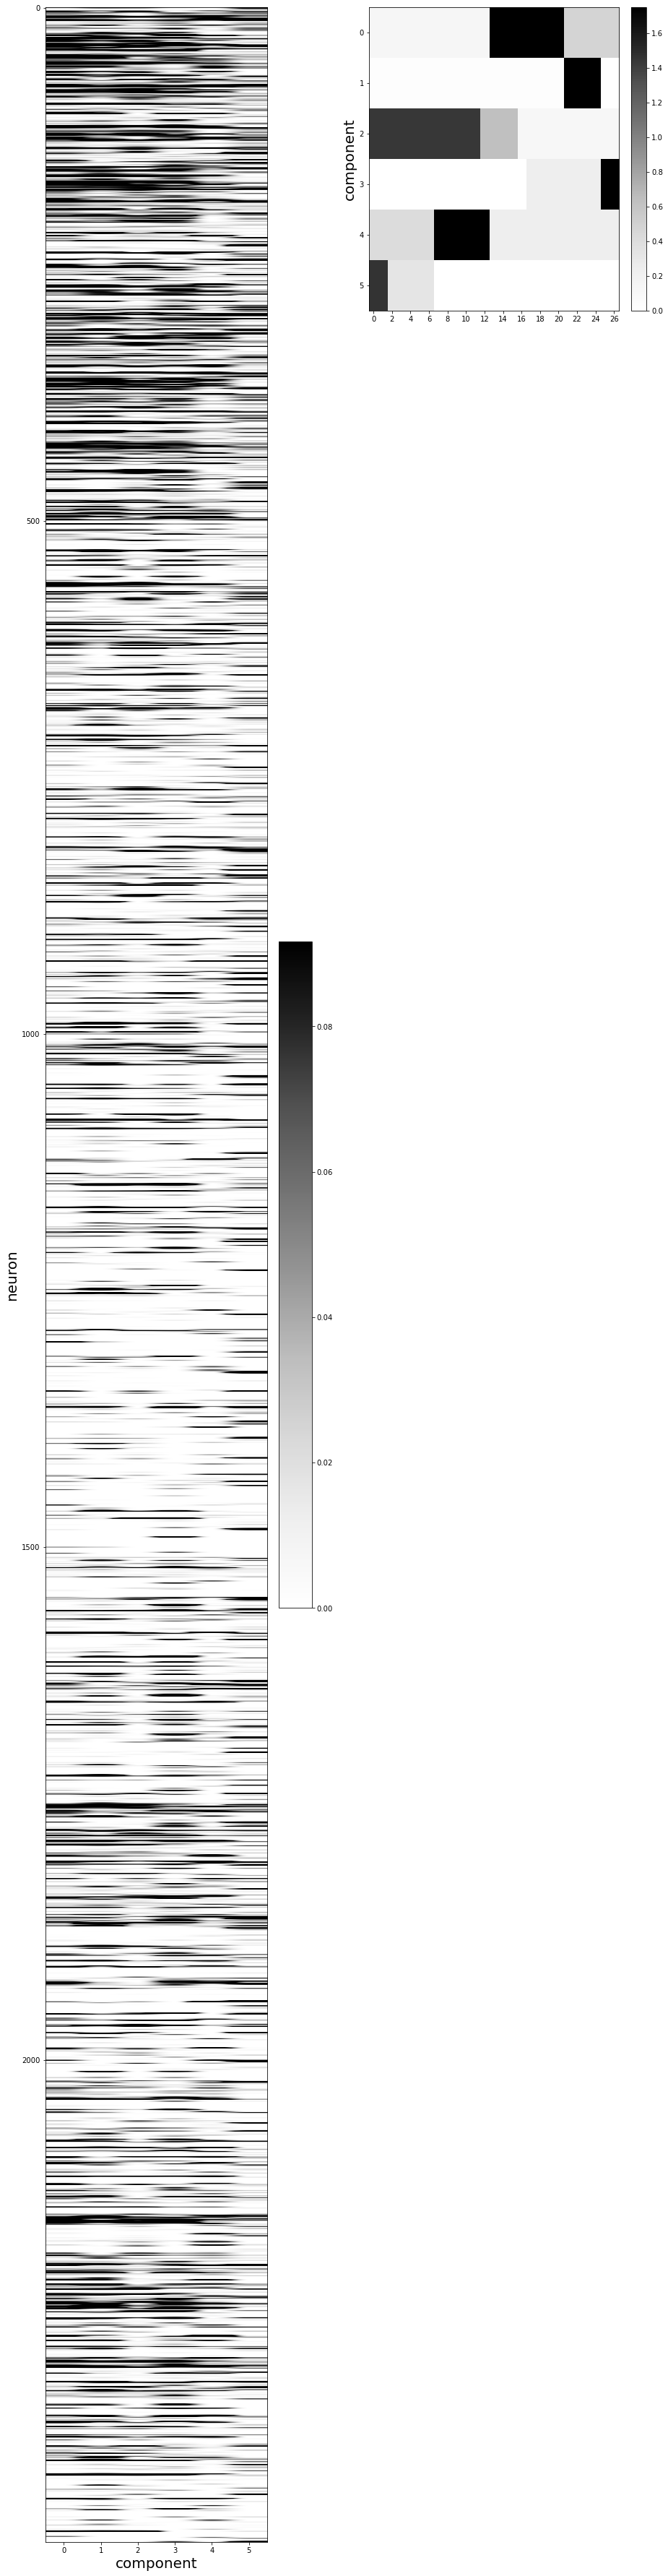

In [10]:
nmfp.plot_wh(w_,h_)

In [173]:
bkps_l

array([array([ 0, 12, 21, 23, 25, 27]), array([ 0, 21, 23, 27]),
       array([ 0, 12, 27]), array([ 0, 25, 27]), array([ 0,  6, 21, 27]),
       array([ 0,  2, 27])], dtype=object)

In [13]:
bkps_l

array([array([ 0,  7, 21, 27]), array([ 0, 21, 23, 27]),
       array([ 0,  7, 13, 27]), array([ 0, 13, 23, 27])], dtype=object)

In [19]:
np.triu(np.corrcoef([[1,2,3],[3,4,5]]))

array([[1., 1.],
       [0., 1.]])

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 1800 reached. Increase it to improve convergence.
  warnings.warn(


(<Figure size 918x3556.8 with 4 Axes>,
 {'W': <AxesSubplot:label='W', xlabel='component', ylabel='neuron'>,
  'H': <AxesSubplot:label='H', ylabel='component'>})

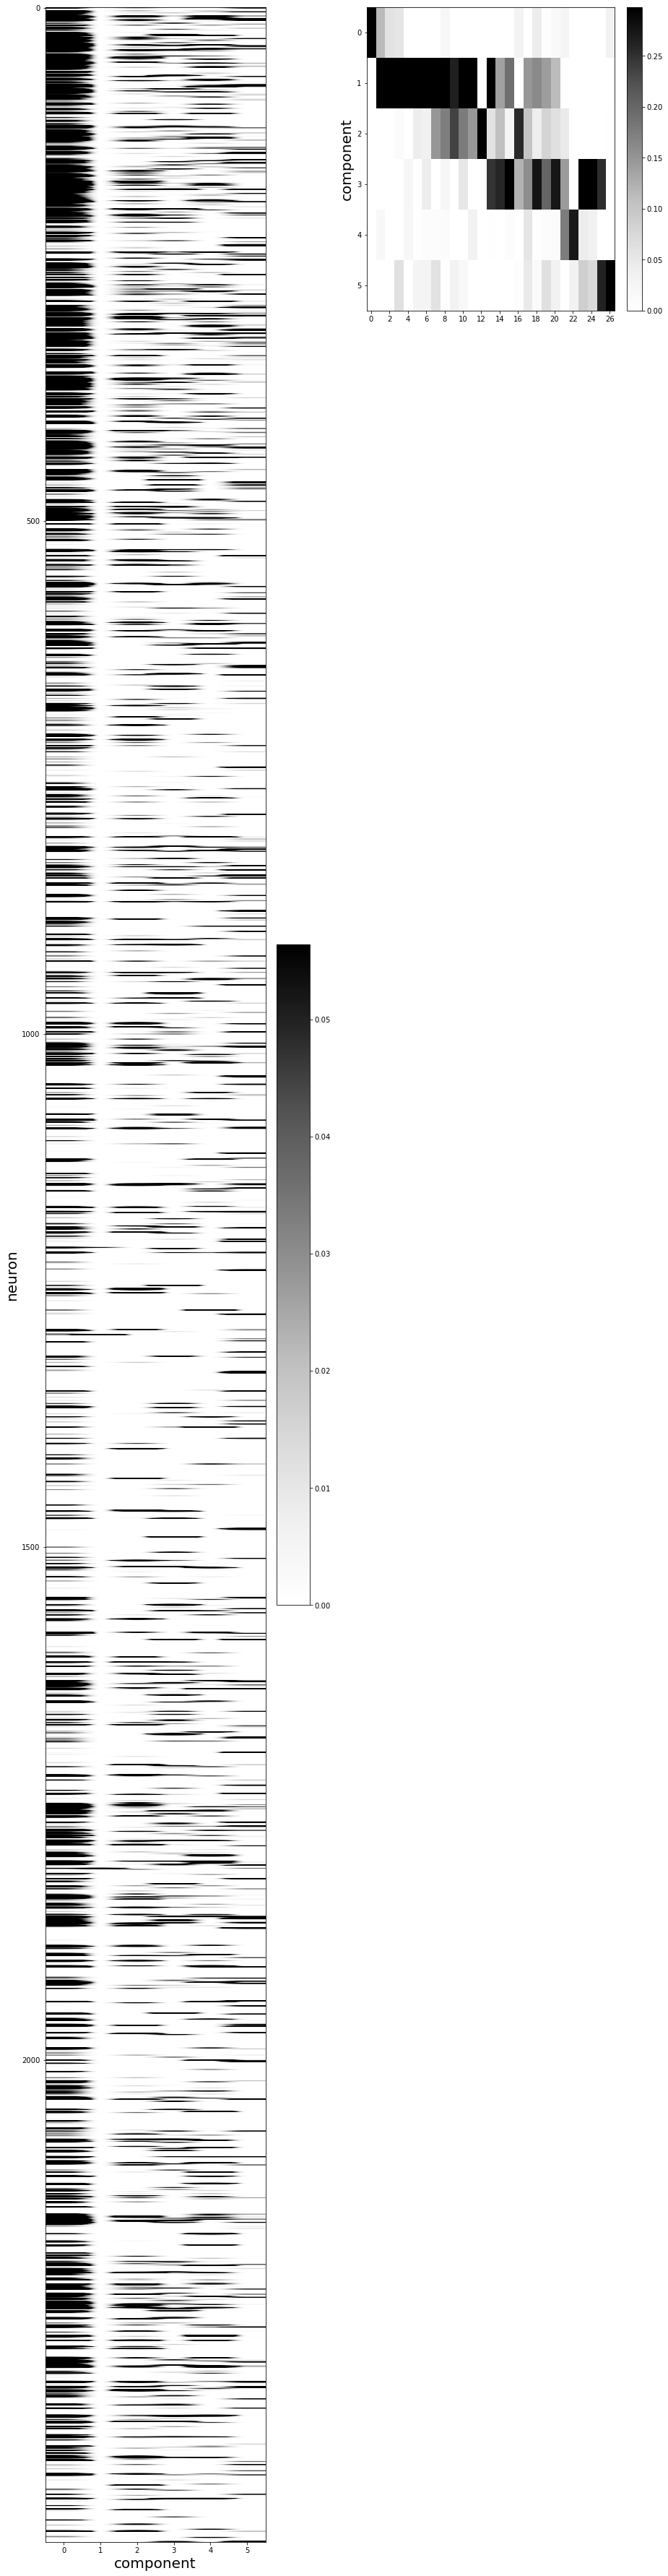

In [185]:
n_compo=6
model=NMF(n_components=n_compo,random_state=2,init='random',alpha_W=0.01,l1_ratio=1.,alpha_H=0.001,max_iter=1800)

X = X_normed_restacked_df.values
w_sk=model.fit_transform(X)
h_sk_2=model.components_

H_inds,h_sk = na.sort_by_peak_within_factor(h_sk)
w_sk = w_sk[:,H_inds] #reorder factors
model.reconstruction_err_
nmfp.plot_wh(w_sk,h_sk)

(<Figure size 918x3556.8 with 4 Axes>,
 {'W': <AxesSubplot:label='W', xlabel='component', ylabel='neuron'>,
  'H': <AxesSubplot:label='H', ylabel='component'>})

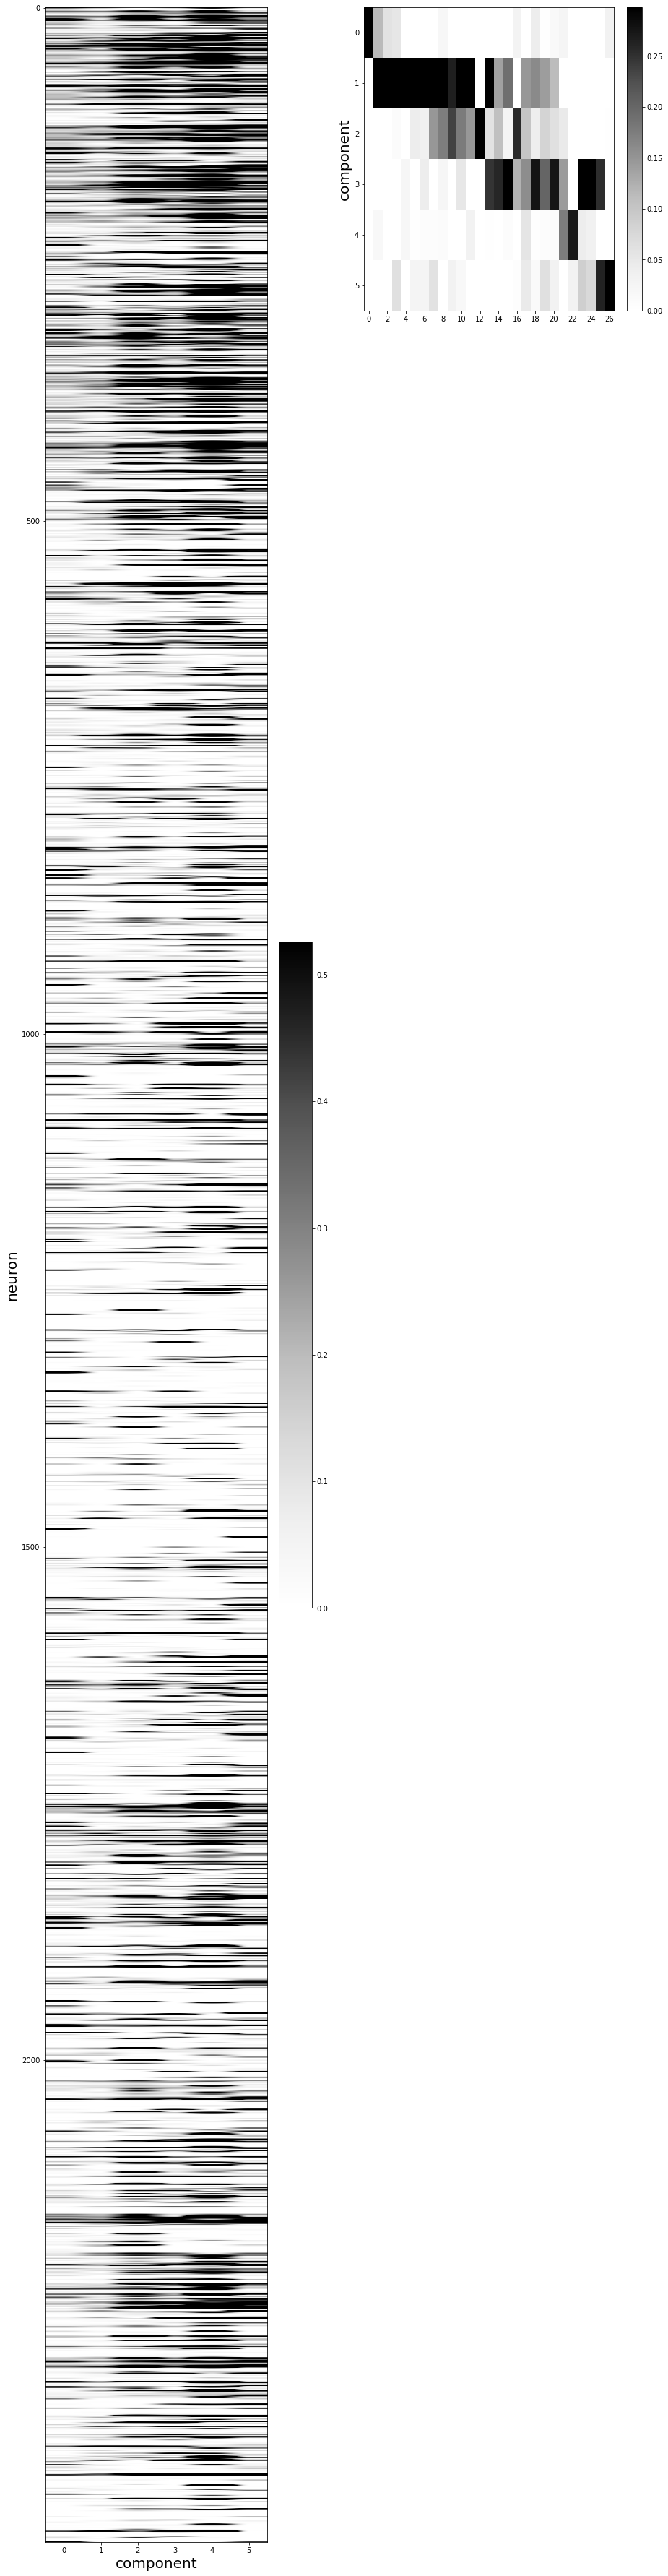

In [100]:
n_compo=6
model=NMF(n_components=n_compo,random_state=1,init='random')

X = X_normed_restacked_df.values
w_sk=model.fit_transform(X)
h_sk=model.components_

H_inds,h_sk = na.sort_by_peak_within_factor(h_sk)
w_sk = w_sk[:,H_inds] #reorder factors
model.reconstruction_err_
nmfp.plot_wh(w_sk,h_sk)

In [95]:
reload(na)

<module 'nmf_analysis' from '/mnt/home/szheng/projects/nmf_analysis/nmf_analysis.py'>

In [123]:
from scipy.spatial.distance import squareform,pdist,cdist

In [114]:
nrefits=10
n_compo=6
h_sorted_l = []
err_l = []
import tqdm
for _ in tqdm.tqdm(range(nrefits)):
    model = NMF(n_compo, init='random',max_iter=800)
    model.fit(X)
    err = model.reconstruction_err_
    err_l.append(err)
    h = model.components_  
    h_inds,h_sorted=na.sort_by_peak_within_factor(h)
    h_sorted=h_sorted.reshape(1,-1)
    h_sorted_l.append(h_sorted)
min_err_index = np.argmin(err_l)
h_sorted_l = np.concatenate(h_sorted_l,axis=0)
# corr = np.corrcoef(h_sorted_l)
dist=squareform(pdist(h_sorted_l)) / np.linalg.norm(h_sorted_l,axis=1)[:,None]
corr=dist
mask = np.ones(nrefits,dtype=bool)
mask[min_err_index]=0
corr_selected=corr[min_err_index,mask]
# mean_corr = np.mean(corr[np.triu_indices(nrefits,k=1)])
mean_corr = np.mean(corr_selected)

100%|██████████| 10/10 [00:01<00:00,  9.37it/s]


In [119]:
pdist(h_sorted_l)

array([1.20193231, 2.17927396, 1.51237775, 1.31227685, 1.30297884,
       1.40437414, 1.81670974, 2.95564929, 1.27101444, 1.95896781,
       1.72104474, 1.2787536 , 0.95739104, 0.83897092, 1.67785674,
       2.43467501, 1.33226965, 1.34219451, 1.20714852, 1.75736453,
       2.23982451, 0.62831966, 3.11483592, 2.56085304, 0.62353894,
       1.93843607, 1.66695827, 1.33960451, 3.12797793, 1.73991338,
       1.49196366, 1.38045258, 0.99573259, 2.8170845 , 1.69537717,
       1.56885995, 1.39288982, 2.55597492, 1.93005556, 2.09563644,
       2.66560676, 0.84637225, 2.93899624, 2.45092943, 3.0817988 ])

In [149]:
reload(cv)
import itertools

In [150]:
train_err_l = []
test_err_l = []
for rank,ii in itertools.product([2,4,6],range(10)):
    U, Vt, train_err, test_err = cv.cv_pca(X,2,p_holdout=0.2,nonneg=True)
    train_err_l.append((rank, train_err))
    test_err_l.append((rank, test_err))

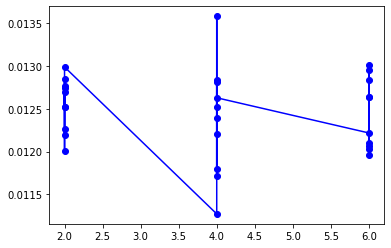

In [153]:
plt.plot(*list(zip(*test_err_l)),'o-b')

In [147]:
test_err

0.011988727168436478

In [118]:
np.linalg.norm(h_sorted_l,axis=1)[:,None]

array([[2.94199172],
       [2.45119512],
       [2.93796559],
       [2.82247356],
       [2.63108105],
       [2.56769356],
       [2.75366279],
       [2.80536072],
       [2.80616101],
       [3.19129244]])

In [133]:
cdist(h_sk.reshape(1,-1),h_sk_2.reshape(1,-1))

array([[3.42201086]])

In [139]:
np.linalg.norm(h_sk.reshape(1,-1))
np.linalg.norm(h_sk_2.reshape(1,-1))

2.7498800383115554

In [142]:
cdist(h_sk_2.reshape(1,-1),h_sorted_l[[2]])

array([[3.84422583]])

In [131]:
# cdist(h_sorted_l[[0]],h_sorted_l[[2]]) /np.linalg.norm(h_sorted_l[[0]])
cdist(h_sk.reshape(1,-1),h_sk_2.reshape(1,-1)) /np.linalg.norm(h_sk)

array([[1.42208978]])

In [38]:
# similarity_l=na.refit_get_similarity(X,[1,2,3,4,5,6],nrefits=20)
similarity_l=na.refit_get_similarity(X,[3,4,5],nrefits=20)

100%|██████████| 20/20 [00:01<00:00, 17.73it/s]


In [96]:
similarity_l=na.refit_get_similarity(X,[1,2,3,4,5,6,7,8],nrefits=60)

 70%|███████   | 42/60 [00:04<00:01, 10.46it/s]/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 800 reached. Increase it to improve convergence.
  warnings.warn(
 60%|██████    | 36/60 [00:04<00:02,  8.15it/s]/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 800 reached. Increase it to improve convergence.
  warnings.warn(
100%|██████████| 60/60 [00:08<00:00,  6.71it/s]


<AxesSubplot:>

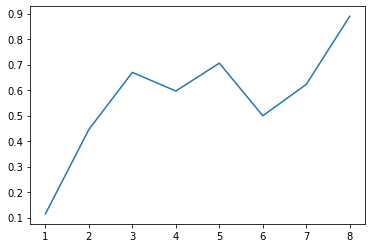

In [97]:
similarity_l.plot()

<AxesSubplot:>

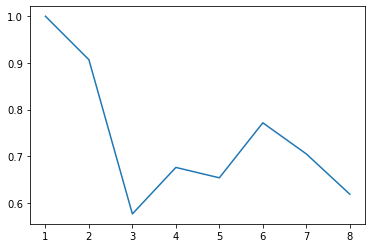

In [77]:
similarity_l.plot()

In [64]:
similarity_l

1    1.000000
2    0.875594
4    0.639850
dtype: float64

In [99]:
from sklearn.linear_model import LinearRegression

In [134]:
avg = np.sqrt(X.mean() / n_compo)
n_samples,n_features=X.shape
H = avg * np.random.normal(size=(n_compo, n_features)).astype(
X.dtype, copy=False
)
W = avg * np.random.normal(size=(n_samples, n_compo)).astype(
X.dtype, copy=False
)
np.abs(H, out=H)
np.abs(W, out=W)
w_init = W
h_init=H

In [109]:
# w,s,h=np.linalg.svd(X)

# w_init = 
# h =
# w_init=w[:,:n_compo]
# w_init[w_init<=0] =0.
# h_init=w[:n_compo,]
# h_init[h_init<=0] =0.

In [179]:
def nlstsq_one_iter(X,w_hat,h_hat,update_h=True,update_w=True):
    if update_h:
        nnlr=LinearRegression(fit_intercept=False,positive=True)
        nnlr.fit(w_hat,X)    
        h_hat = nnlr.coef_.T
    if update_w:
        nnlr=LinearRegression(fit_intercept=False,positive=True)
        w_hat = nnlr.fit(h_hat.T,X.T).coef_
    err = np.linalg.norm(X - w_hat.dot(h_hat),ord='fro')
    return w_hat, h_hat, err
    

def recon_signal(signal,bkps):

    bkps = np.insert(bkps,0,0)                            
    val_l = []
    for ii in range(len(bkps)-1):
        signal_chunk=signal[bkps[ii]:bkps[ii+1]]
        val = signal_chunk.mean(axis=-1)
        val_l.append([val]*len(signal_chunk))
    val_l = np.concatenate(val_l,axis=-1)
    return val_l
        
    

def make_h_piecewise_constant(h_hat):
    h_recon_l = []
    n_compo = h_hat.shape[0]
    l = 0
    for i in range(n_compo):
        signal = h_hat[i,:]
        algo=rpt.Dynp('l2',min_size=2,jump=1).fit(signal)
        n_bkps = 1 if (i==0 or i==n_compo-1) else 2
        bkps = algo.predict(n_bkps=n_bkps)
        l += algo.cost.sum_of_costs(list(bkps))
        h_recon = recon_signal(signal,bkps)
        h_recon_l.append(h_recon)
    h_recon_l = np.array(h_recon_l)
    return h_recon_l, l

In [189]:
def nmf_h_pw_constant_fit_one_iter(X,w_hat,h_hat):
    # given w, update h
    w_hat, h_hat, nmf_err = nlstsq_one_iter(X, w_hat, h_hat,update_w=False)
    # sort wh to make sure the order of h is correct, this way the number of changepoints for different factors is correct
    H_inds,h_hat = na.sort_by_peak_within_factor(h_hat)
    w_hat = w_hat[:,H_inds] #reorder factors
    # given h, turn into piecewise constant
    h_hat,pwc_l = make_h_piecewise_constant(h_hat)
    # given h, update w
    w_hat, h_hat, nmf_err = nlstsq_one_iter(X, w_hat, h_hat,update_h=False)
    err_tot = pwc_l + nmf_err
    return w_hat, h_hat, err_tot, nmf_err, pwc_l

In [226]:
def nmf_h_pw_constant_fit(X,n_compo,**kwargs):
    kwargs_={'max_pwc_iter':10}
    kwargs_.update(kwargs)
    max_pwc_iter = kwargs_['max_pwc_iter']
    
    model=NMF(n_compo)
    w_hat=model.fit_transform(X)
    h_hat=model.components_
    
    error_tot_l, nmf_err_l, pwc_l_l = [],[],[]
    for ii in range(max_pwc_iter):
        w_hat_, h_hat_, error_tot, nmf_err, pwc_l = nmf_h_pw_constant_fit_one_iter(X,w_hat,h_hat)
        if ii>0 and error_tot > error_tot_l[-1]:
            return w_hat,h_hat,np.array(error_tot_l), np.array(nmf_err_l), np.array(pwc_l_l)
        else:
            w_hat = w_hat_
            h_hat = h_hat_
            error_tot_l.append(error_tot)
            nmf_err_l.append(nmf_err)
            pwc_l_l.append(pwc_l)
    return w_hat,h_hat,np.array(error_tot_l), np.array(nmf_err_l), np.array(pwc_l_l)
    


In [227]:
%time w_hat,h_hat,err_tot,err_nmf,err_pwc=nmf_h_pw_constant_fit(X,n_compo=4,max_pwc_iter=20)

CPU times: user 2.7 s, sys: 2.52 s, total: 5.21 s
Wall time: 1.9 s


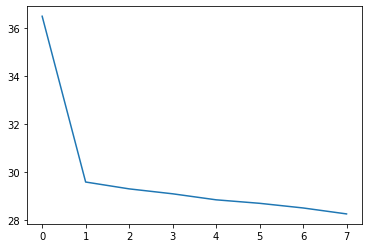

In [228]:
plt.plot(err_tot)

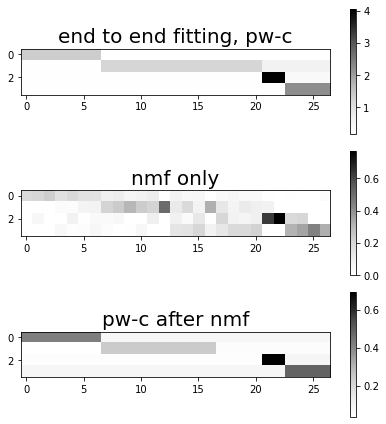

In [242]:
fig,axs=plt.subplots(3,1,figsize=(6,6))
im=axs[0].imshow(h_hat)
axs[0].set_title('end to end fitting, pw-c')
fig.colorbar(im,ax=axs[0])
im=axs[1].imshow(h_sk)
fig.colorbar(im,ax=axs[1])
axs[1].set_title('nmf only')
im=axs[2].imshow(h_recon_l)
fig.colorbar(im,ax=axs[2])
axs[2].set_title('pw-c after nmf')
plt.tight_layout()


In [231]:
X_hat=w_hat.dot(h_hat)

X_hat_df = pd.DataFrame(X_hat,index=X_normed_restacked_df.index,columns=X_normed_restacked_df.columns)

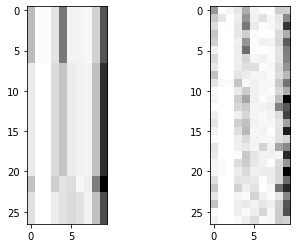

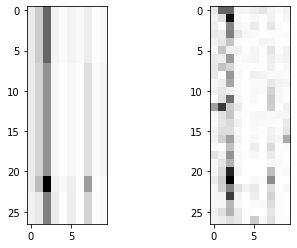

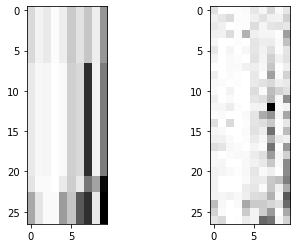

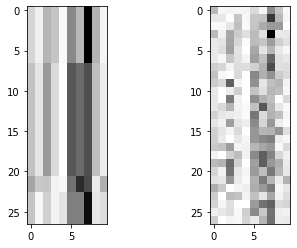

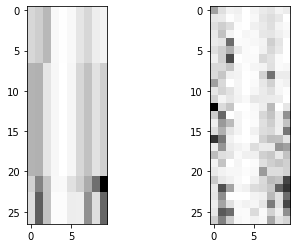

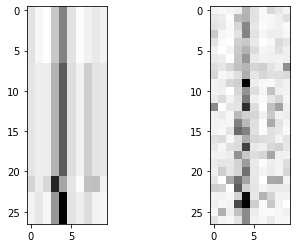

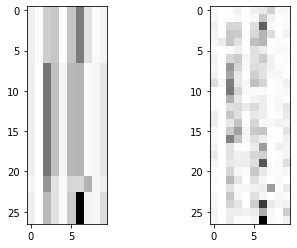

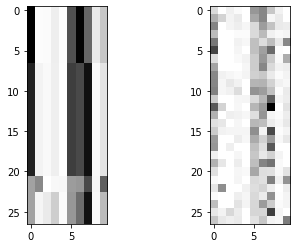

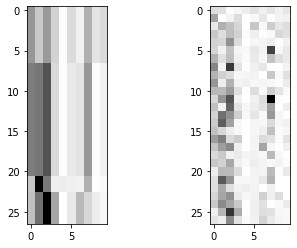

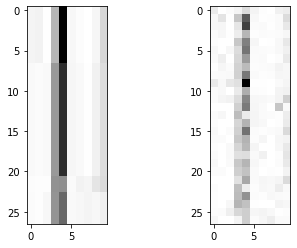

In [232]:
for nn in np.unique(X_normed_restacked_df.index.get_level_values(0))[:10]:
    fig,axs=plt.subplots(1,2)
    axs[0].imshow(X_hat_df.loc[nn].T)
    axs[1].imshow(X_normed_restacked_df.loc[nn].T)

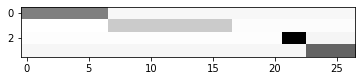

In [160]:
plt.imshow(h_recon_l)

CPU times: user 5.12 s, sys: 5.09 s, total: 10.2 s
Wall time: 3.8 s


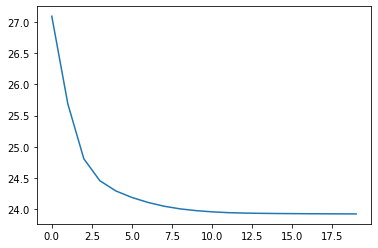

In [135]:
%%time
w_hat = w_init
h_hat = h_init
err_l = []
for i in range(20):
    w_hat,h_hat,err=nlstsq_one_iter(X, w_hat,h_hat)
    err_l.append(err)
err_l = np.array(err_l)
plt.plot(err_l)
H_inds,h_hat = na.sort_by_peak_within_factor(h_hat)
w_hat = w_hat[:,H_inds] #reorder factors

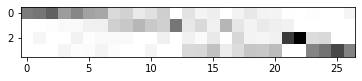

In [136]:
plt.imshow(h_hat)

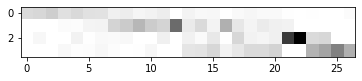

In [122]:
plt.imshow(h_sk)